In [1]:
# Import libraries we need

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [2]:
# Import our data from csv
df=pd.read_csv('Documents/Capstone Project/Data/Life Expectancy Data.csv')

In [3]:
# Check the data we have in our dataframe
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Let's check columns names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# let's clean the whitespaces in columns names
df = df.rename(columns = lambda x:x.strip())
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Check our data statistics
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [9]:
# As we can see from table above infant deaths, Measles and under-five deaths columns have values greater than 1000. These values are wrong because the data are for 1000 people.
cols = ['infant deaths', 'Measles', 'under-five deaths']
for col in cols:
    df.loc[df[col]>1000, col] = np.nan

In [10]:
# Check our changes are made
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2925.000000   
mean   2007.518720        69.224932       164.796448      23.942906   
std       4.613841         9.523867       124.292079      67.557336   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      21.000000   
max    2015.000000        89.000000       723.000000    1000.000000   

           Alcohol  percentage expenditure  Hepatitis B      Measles  \
count  2744.000000             2938.000000  2385.000000  2413.000000   
mean      4.602861              738.251295    80.940461    88.976378   
std       4.052413             1987.914858    25.070016   186.937609   
min       0.010000                0.000000     1.000000     0.000000   
25%       0.877500                4.685343    77.000000     0.000000   
50%       3.755000               64.912906    92.000000     4.000000   
75%       7.702500              441.534144    97.000000    66.000000   
max      17.870000            19479.911610    99.000000   999.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2922.000000  2919.000000         2712.00000   
mean     38.321247          32.341205    82.550188            5.93819   
std      20.044034          87.456561    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          26.000000    97.000000            7.49250   
max      87.300000         943.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [11]:
# Next step we check if we have null data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                       13
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                            525
BMI                                 34
under-five deaths                   16
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
# We group data by Country
result = df.groupby('Country').agg({'GDP': 'mean', 'Alcohol': 'mean', 'Hepatitis B': 'mean', 'Total expenditure': 'mean', 'Population': 'mean', 'Income composition of resources': 'mean',  'Schooling': 'mean' })
result

GDP   Alcohol  Hepatitis B  \
Country                                                                  
Afghanistan                          340.015425  0.014375    64.562500   
Albania                             2119.726679  4.848750    98.000000   
Algeria                             2847.853392  0.406667    78.000000   
Angola                              1975.143045  5.740667    70.222222   
Antigua and Barbuda                 9759.305728  7.949333    98.266667   
...                                         ...       ...          ...   
Venezuela (Bolivarian Republic of)          NaN  7.420000    66.250000   
Viet Nam                                    NaN  3.087333    87.538462   
Yemen                                       NaN  0.047333    55.687500   
Zambia                               811.811841  2.239333    69.818182   
Zimbabwe                             410.980194  4.482000    70.562500   

                                    Total expenditure    Population  \
Country                                                               
Afghanistan                                  8.252500  9.972260e+06   
Albania                                      5.945625  6.969116e+05   
Algeria                                      4.604000  2.164983e+07   
Angola                                       3.919333  1.014710e+07   
Antigua and Barbuda                          4.791333           NaN   
...                                               ...           ...   
Venezuela (Bolivarian Republic of)           4.998667           NaN   
Viet Nam                                     5.977333           NaN   
Yemen                                        5.005333           NaN   
Zambia                                       5.824000  6.260246e+06   
Zimbabwe                                     6.158667  8.021343e+06   

                                    Income composition of resources  Schooling  
Country                                                                         
Afghanistan                                                0.415375    8.21250  
Albania                                                    0.709875   12.13750  
Algeria                                                    0.694875   12.71250  
Angola                                                     0.458375    8.04375  
Antigua and Barbuda                                        0.488625    8.84375  
...                                                             ...        ...  
Venezuela (Bolivarian Republic of)                         0.726812   12.78750  
Viet Nam                                                   0.627062   11.51250  
Yemen                                                      0.475500    8.50625  
Zambia                                                     0.498437   11.21250  
Zimbabwe                                                   0.439125    9.82500  

[193 rows x 7 columns]

In [13]:
# As we can see from data grouping above, we can not use country to fill missing data for GDP and Population as some countries have no data at all for these indicators.
# For GDP we will use the status of countries
mean_GDP_by_status = df.groupby('Status')['GDP'].mean()
df['GDP'] = df.apply(lambda row: mean_GDP_by_status[row['Status']] if pd.isnull(row['GDP']) else row['GDP'], axis=1)

In [14]:
# We fill the missing data for population with the mean of the Population data
df['Population'].fillna((df['Population'].mean()), inplace=True)

In [15]:
# Now we fill the missing data for alcohol by using the mean of Alcohol by country
mean_Alcohol_by_country = df.groupby('Country')['Alcohol'].mean()
df['Alcohol'] = df.apply(lambda row: mean_Alcohol_by_country[row['Country']] if pd.isnull(row['Alcohol']) else row['Alcohol'], axis=1)

In [16]:
# Next step we check if we have still null data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                       13
Alcohol                             17
percentage expenditure               0
Hepatitis B                        553
Measles                            525
BMI                                 34
under-five deaths                   16
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
# Now we fill the missing data for Hepatitis b by using the mean by country
mean_hepb_by_country = df.groupby('Country')['Hepatitis B'].mean()
df['Hepatitis B'] = df.apply(lambda row: mean_hepb_by_country[row['Country']] if pd.isnull(row['Hepatitis B']) else row['Hepatitis B'], axis=1)

In [18]:
# Now we fill the missing data for Total expenditure by using the mean by country
mean_tot_exp_by_country = df.groupby('Country')['Total expenditure'].mean()
df['Total expenditure'] = df.apply(lambda row: mean_tot_exp_by_country[row['Country']] if pd.isnull(row['Total expenditure']) else row['Total expenditure'], axis=1)

In [19]:
# Now we fill the missing data for Income composition of resources by using the mean by country
mean_inc_comp_by_country = df.groupby('Country')['Income composition of resources'].mean()
df['Income composition of resources'] = df.apply(lambda row: mean_inc_comp_by_country[row['Country']] if pd.isnull(row['Income composition of resources']) else row['Income composition of resources'], axis=1)

In [20]:
# Now we check again if we have still null data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                       13
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                            525
BMI                                 34
under-five deaths                   16
Polio                               19
Total expenditure                   32
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
# As we  can see we have many missing data for alcohol, Hepatitis B, BMI, Polio, etc. We will fill missing data for these columns by using country status
# Filling the missing data for alcohol
mean_Alcohol_by_status = df.groupby('Status')['Alcohol'].mean()
df['Alcohol'] = df.apply(lambda row: mean_Alcohol_by_status[row['Status']] if pd.isnull(row['Alcohol']) else row['Alcohol'], axis=1)

In [22]:
# We fill the missing data for Hepatitis B by using the mean of status for this indicator
mean_HepatitisB_by_status = df.groupby('Status')['Hepatitis B'].mean()
df['Hepatitis B'] = df.apply(lambda row:mean_HepatitisB_by_status[row['Status']] if pd.isnull(row['Hepatitis B']) else row['Hepatitis B'], axis=1)

In [23]:
# Filling the missing data for BMI
mean_BMI_by_status = df.groupby('Status')['BMI'].mean()
df['BMI'] = df.apply(lambda row: mean_BMI_by_status[row['Status']] if pd.isnull(row['BMI']) else row['BMI'], axis=1)

In [24]:
# Filling the missing data for Polio
mean_Polio_by_status = df.groupby('Status')['Polio'].mean()
df['Polio'] = df.apply(lambda row: mean_Polio_by_status[row['Status']] if pd.isnull(row['Polio']) else row['Polio'], axis=1)

In [25]:
# Filling the missing data for Total expenditure
mean_Totalexpenditure_by_status = df.groupby('Status')['Total expenditure'].mean()
df['Total expenditure'] = df.apply(lambda row: mean_Totalexpenditure_by_status[row['Status']] if pd.isnull(row['Total expenditure']) else row['Total expenditure'], axis=1)

In [26]:
# Filling the missing data for Diphtheria
mean_Diphtheria_by_status = df.groupby('Status')['Diphtheria'].mean()
df['Diphtheria'] = df.apply(lambda row: mean_Diphtheria_by_status[row['Status']] if pd.isnull(row['Diphtheria']) else row['Diphtheria'], axis=1)

In [27]:
# Filling the missing data for thinness 1-19 years
mean_thinness_by_status = df.groupby('Status')['thinness  1-19 years'].mean()
df['thinness  1-19 years'] = df.apply(lambda row: mean_thinness_by_status[row['Status']] if pd.isnull(row['thinness  1-19 years']) else row['thinness  1-19 years'], axis=1)

In [28]:
# Filling the missing data for Income composition of resources
mean_Income_by_status = df.groupby('Status')['Income composition of resources'].mean()
df['Income composition of resources'] = df.apply(lambda row: mean_Income_by_status[row['Status']] if pd.isnull(row['Income composition of resources']) else row['Income composition of resources'], axis=1)

In [29]:
# Filling the missing data for Schooling
mean_Schooling_by_status = df.groupby('Status')['Schooling'].mean()
df['Schooling'] = df.apply(lambda row: mean_Schooling_by_status[row['Status']] if pd.isnull(row['Schooling']) else row['Schooling'], axis=1)

In [30]:
# Filling the missing data for Measles
mean_Measles_by_status = df.groupby('Status')['Measles'].mean()
df['Measles'] = df.apply(lambda row: mean_Measles_by_status[row['Status']] if pd.isnull(row['Measles']) else row['Measles'], axis=1)

In [31]:
# Filling the missing data for infant deaths
mean_infantdeaths_by_status = df.groupby('Status')['infant deaths'].mean()
df['infant deaths'] = df.apply(lambda row: mean_infantdeaths_by_status[row['Status']] if pd.isnull(row['infant deaths']) else row['infant deaths'], axis=1)

In [32]:
# Filling the missing data for under five deaths
mean_under_fivedeaths_by_status = df.groupby('Status')['under-five deaths'].mean()
df['under-five deaths'] = df.apply(lambda row: mean_under_fivedeaths_by_status[row['Status']] if pd.isnull(row['under-five deaths']) else row['under-five deaths'], axis=1)

In [33]:
# Next step we check if we still have null data
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness  1-19 years                0
thinness 5-9 years                 34
Income composition of resources     0
Schooling                           0
dtype: int64

In [34]:
# Now we will drop the rows with missing values for our dependent variables
data = df[df['Life expectancy'].notna()]

In [35]:
# We will drop the Country, Year and thinness 5-9 years column as we dont need for our analysis
data.drop(['Country', 'Year', 'thinness 5-9 years'], axis=1, inplace=True)

C:\Users\jona_\AppData\Local\Temp\ipykernel_32196\2053036262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Country', 'Year', 'thinness 5-9 years'], axis=1, inplace=True)


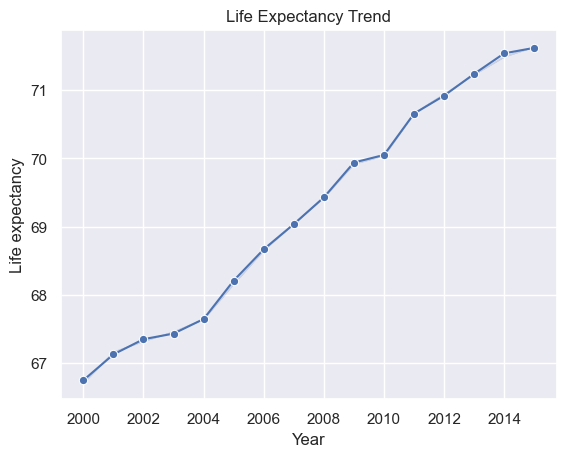

In [38]:
# Below we will visualize the life excpectancy trends
plt.figure()
sns.lineplot(x = 'Year', y = 'Life expectancy', data = df, marker = 'o' ,errorbar=('ci', False))
plt.title("Life Expectancy Trend")
plt.show()

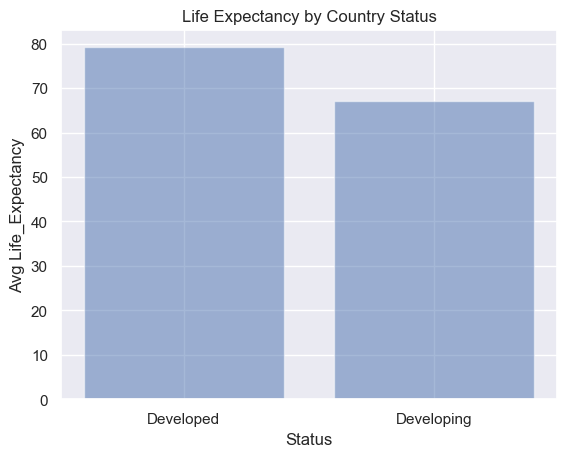

In [39]:
# Below we will visualize the average life expectancy by Country Status
plt.figure()
plt.bar(data.groupby('Status')['Status'].count().index,data.groupby('Status')['Life expectancy'].mean(),alpha=0.50)
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life Expectancy by Country Status")
plt.show()

In [40]:
# Calculate the data
round(data[['Status','Life expectancy']].groupby(['Status']).mean(),2)

Life expectancy
Status                     
Developed             79.20
Developing            67.11

In [41]:
# Now we will check the correlation between independent continuous variables
df_predictors=data[['Adult Mortality', 'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B', 'Measles', 'BMI','under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years','Income composition of resources', 'Schooling' ]].copy()

C:\Users\jona_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


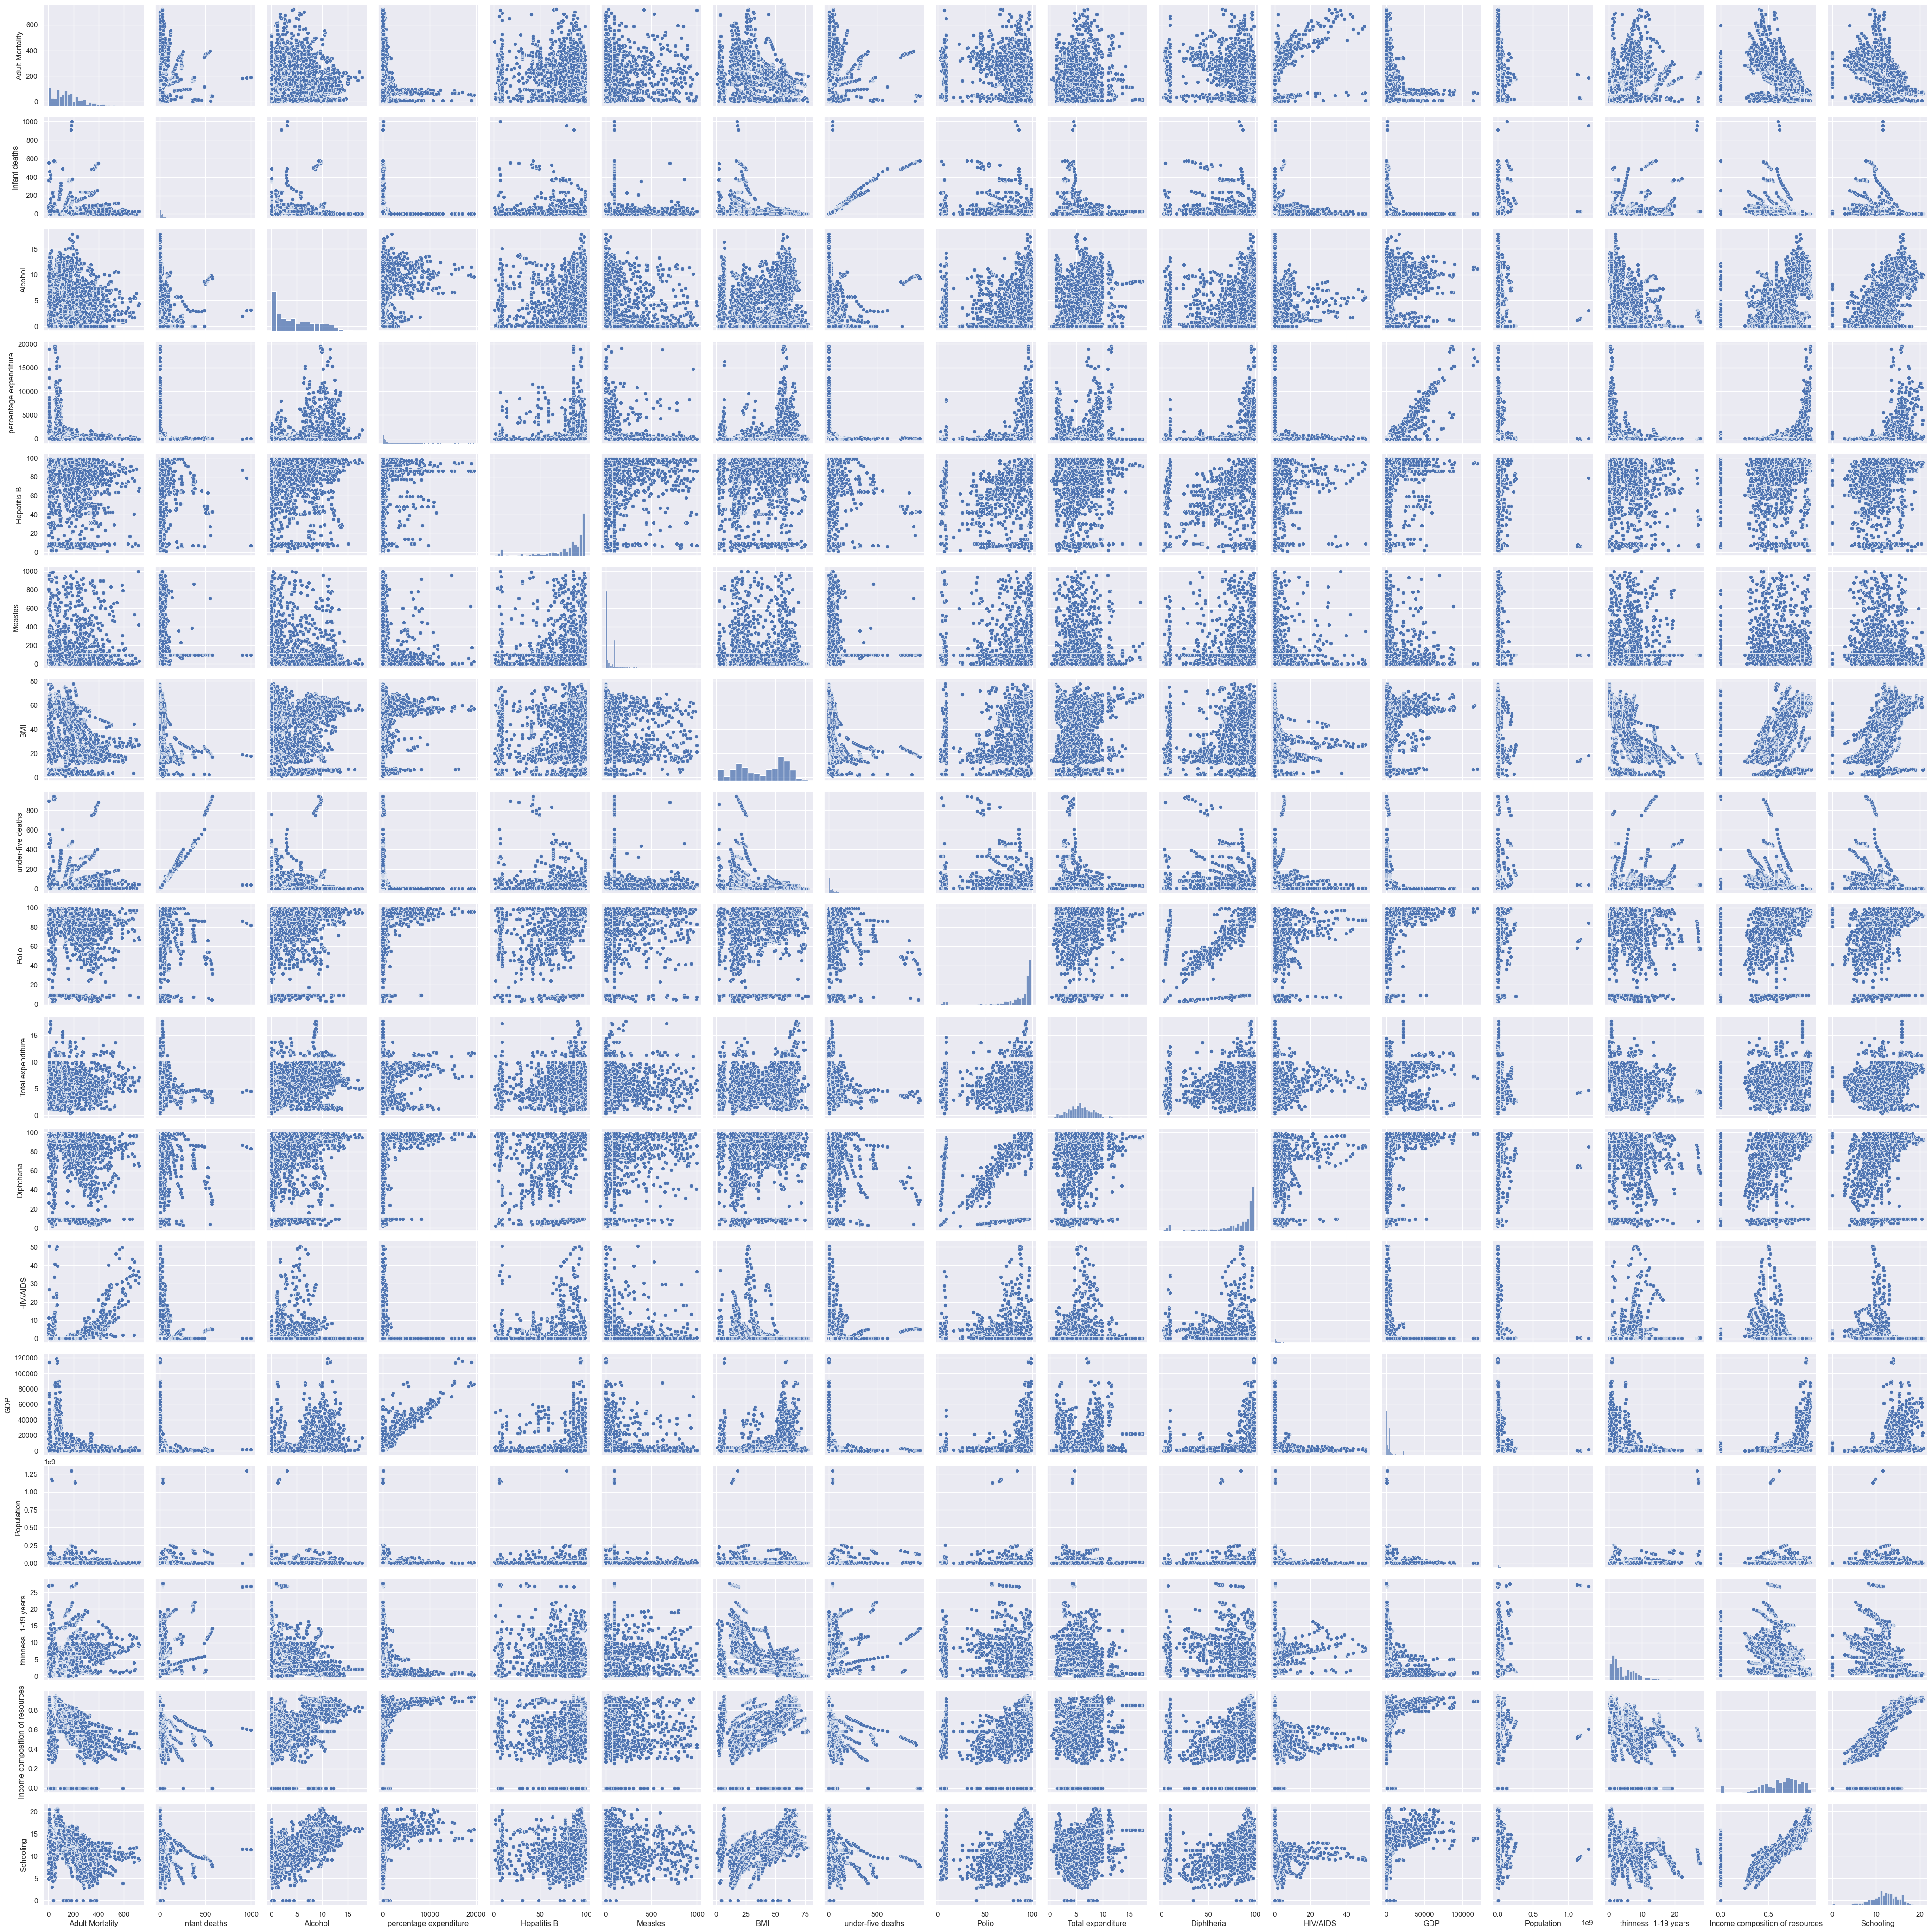

In [42]:
# Visualize predictors
sns.pairplot(df_predictors)

In [43]:
# Now calculate the correlation coefficients between predictors
df_predictors.corr()

Adult Mortality  infant deaths   Alcohol  \
Adult Mortality                         1.000000       0.151661 -0.199812   
infant deaths                           0.151661       1.000000 -0.134954   
Alcohol                                -0.199812      -0.134954  1.000000   
percentage expenditure                 -0.242860      -0.116518  0.330762   
Hepatitis B                            -0.185551      -0.193786  0.104146   
Measles                                 0.122508       0.104603 -0.132056   
BMI                                    -0.385194      -0.282064  0.335989   
under-five deaths                       0.185222       0.890203 -0.130585   
Polio                                  -0.273860      -0.228255  0.225655   
Total expenditure                      -0.125306      -0.166433  0.309401   
Diphtheria                             -0.274158      -0.226415  0.219648   
HIV/AIDS                                0.523821       0.070952 -0.050645   
GDP                                    -0.296758      -0.144001  0.362086   
Population                             -0.012502       0.256546 -0.030206   
thinness  1-19 years                    0.302124       0.335684 -0.434214   
Income composition of resources        -0.455253      -0.213326  0.456352   
Schooling                              -0.453211      -0.270606  0.542077   

                                 percentage expenditure  Hepatitis B  \
Adult Mortality                               -0.242860    -0.185551   
infant deaths                                 -0.116518    -0.193786   
Alcohol                                        0.330762     0.104146   
percentage expenditure                         1.000000     0.031471   
Hepatitis B                                    0.031471     1.000000   
Measles                                       -0.000619    -0.080305   
BMI                                            0.231483     0.194549   
under-five deaths                             -0.122580    -0.213312   
Polio                                          0.147823     0.496122   
Total expenditure                              0.174308     0.116783   
Diphtheria                                     0.144179     0.592345   
HIV/AIDS                                      -0.098230    -0.133842   
GDP                                            0.876008     0.089251   
Population                                    -0.024696    -0.097593   
thinness  1-19 years                          -0.252827    -0.150907   
Income composition of resources                0.373161     0.236425   
Schooling                                      0.381364     0.279669   

                                  Measles       BMI  under-five deaths  \
Adult Mortality                  0.122508 -0.385194           0.185222   
infant deaths                    0.104603 -0.282064           0.890203   
Alcohol                         -0.132056  0.335989          -0.130585   
percentage expenditure          -0.000619  0.231483          -0.122580   
Hepatitis B                     -0.080305  0.194549          -0.213312   
Measles                          1.000000 -0.122346           0.116336   
BMI                             -0.122346  1.000000          -0.304137   
under-five deaths                0.116336 -0.304137           1.000000   
Polio                           -0.110518  0.285846          -0.275278   
Total expenditure               -0.060763  0.239616          -0.171520   
Diphtheria                      -0.096031  0.284621          -0.278024   
HIV/AIDS                         0.099245 -0.243617           0.101844   
GDP                             -0.027284  0.301715          -0.153246   
Population                       0.024033 -0.063182           0.143842   
thinness  1-19 years             0.172504 -0.530924           0.297812   
Income composition of resources -0.108801  0.502201          -0.257027   
Schooling                       -0.155386  0.540842          -0.312879   

                

In [44]:
abs(df_predictors.corr()) > 0.75

Adult Mortality  infant deaths  Alcohol  \
Adult Mortality                             True          False    False   
infant deaths                              False           True    False   
Alcohol                                    False          False     True   
percentage expenditure                     False          False    False   
Hepatitis B                                False          False    False   
Measles                                    False          False    False   
BMI                                        False          False    False   
under-five deaths                          False           True    False   
Polio                                      False          False    False   
Total expenditure                          False          False    False   
Diphtheria                                 False          False    False   
HIV/AIDS                                   False          False    False   
GDP                                        False          False    False   
Population                                 False          False    False   
thinness  1-19 years                       False          False    False   
Income composition of resources            False          False    False   
Schooling                                  False          False    False   

                                 percentage expenditure  Hepatitis B  Measles  \
Adult Mortality                                   False        False    False   
infant deaths                                     False        False    False   
Alcohol                                           False        False    False   
percentage expenditure                             True        False    False   
Hepatitis B                                       False         True    False   
Measles                                           False        False     True   
BMI                                               False        False    False   
under-five deaths                                 False        False    False   
Polio                                             False        False    False   
Total expenditure                                 False        False    False   
Diphtheria                                        False        False    False   
HIV/AIDS                                          False        False    False   
GDP                                                True        False    False   
Population                                        False        False    False   
thinness  1-19 years                              False        False    False   
Income composition of resources                   False        False    False   
Schooling                                         False        False    False   

                                   BMI  under-five deaths  Polio  \
Adult Mortality                  False              False  False   
infant deaths                    False               True  False   
Alcohol                          False              False  False   
percentage expenditure           False              False  False   
Hepatitis B                      False              False  False   
Measles                          False              False  False   
BMI                               True              False  False   
under-five deaths                False               True  False   
Polio                            False              False   True   
Total expenditure                False              False  False   
Diphtheria                       False              False  False   
HIV/AIDS                         False              False  False   
GDP                              False              False  False   
Population                       False              False  False   
thinness  1-19 years             False              False  False   
Income composition of resources  False              False  False   
Schooling                        False           

<Axes: >

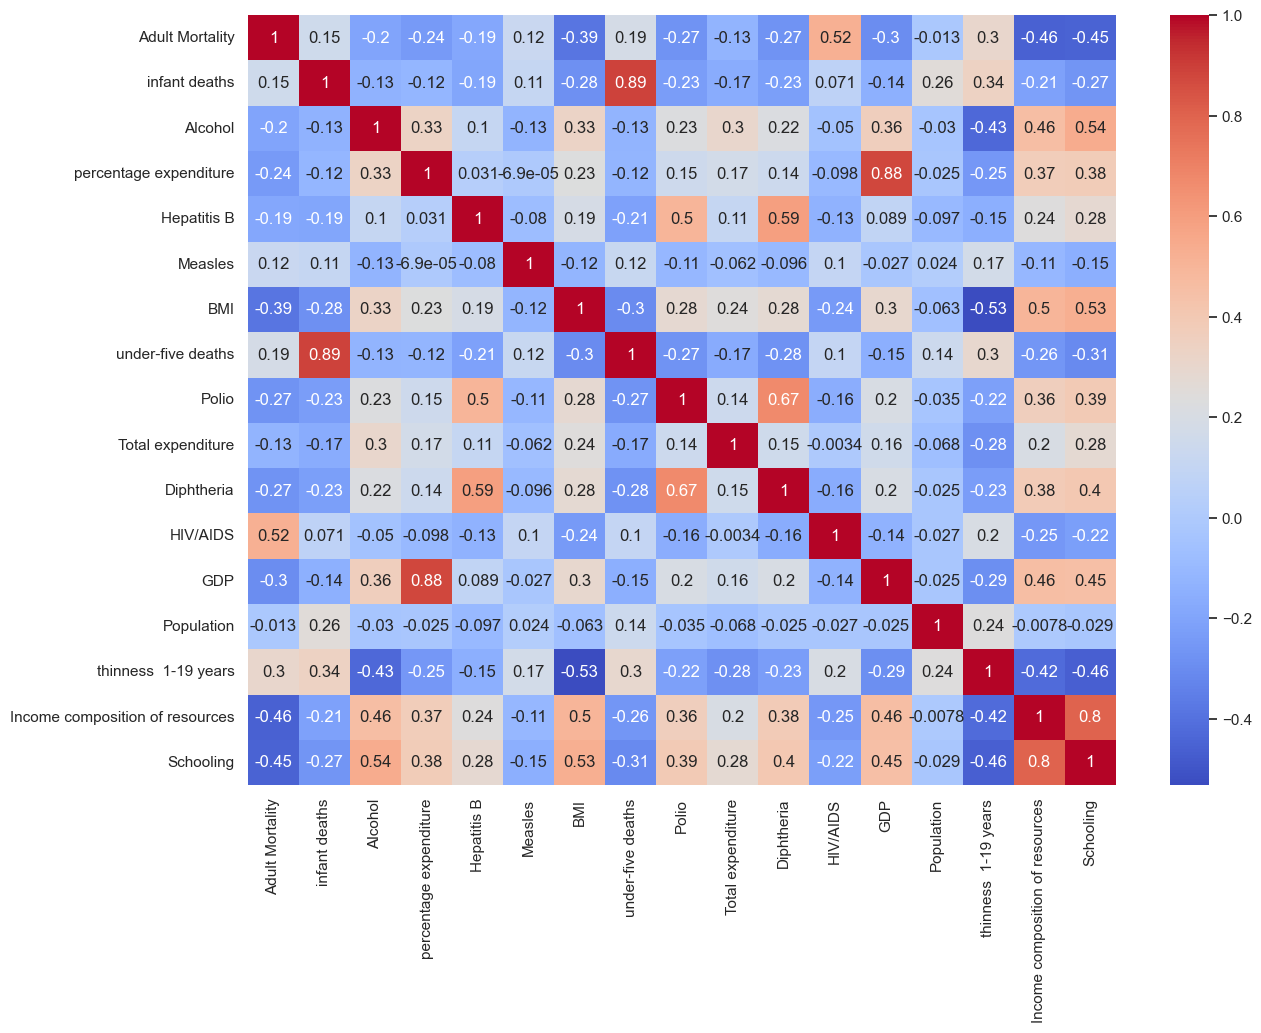

In [45]:
# Visualize the correlation between predictors with heatmap
features = df_predictors.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df[list(features.columns)].corr(), cmap = 'coolwarm', annot = True, ax=ax)

In [46]:
# From heatmap and from the graphs we see that we have three pairs of predictors:
# 1) Schooling-Income composition of resources
# 2) GDP-percentage expenditure
# 3) under-five deaths-infant deaths
# We wiill delete Income composition of resources, percentage expenditure, under-five deaths

In [47]:
# Now we will create our final dataframe without correlated variables
data=data[['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Schooling' ]].copy()

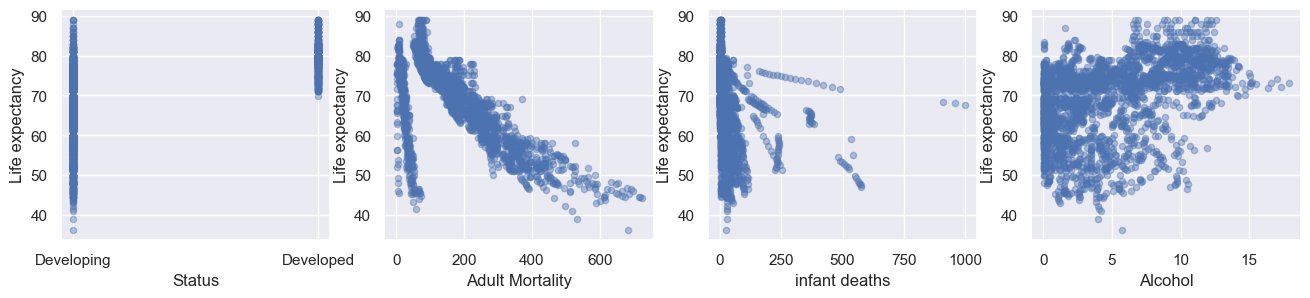

In [48]:
# Below we will visualize the Linearity between dependent and independent variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy', ax=ax, alpha=0.4, color='b')

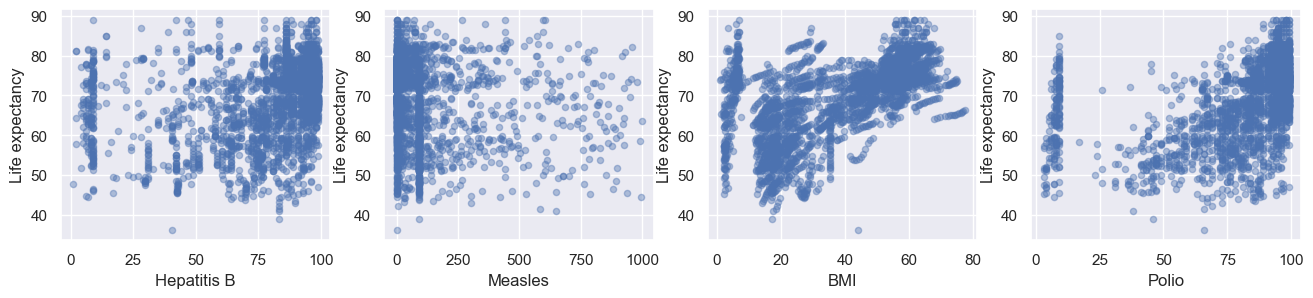

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['Hepatitis B', 'Measles', 'BMI', 'Polio'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy', ax=ax, alpha=0.4, color='b')

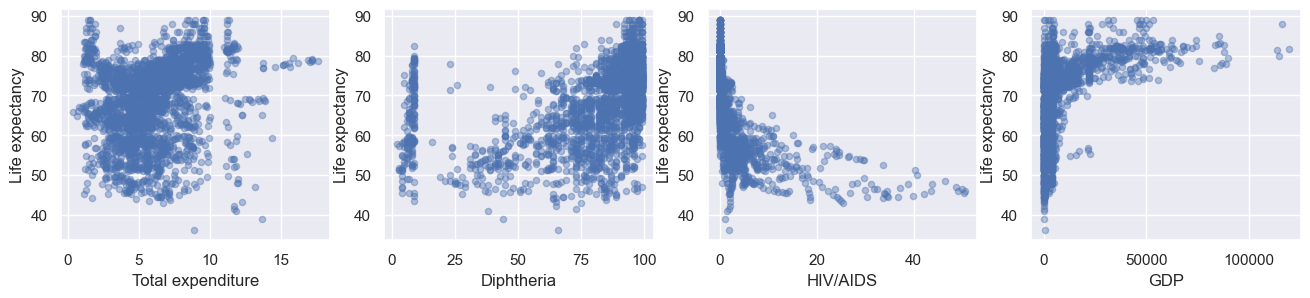

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['Total expenditure', 'Diphtheria','HIV/AIDS', 'GDP'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy', ax=ax, alpha=0.4, color='b')

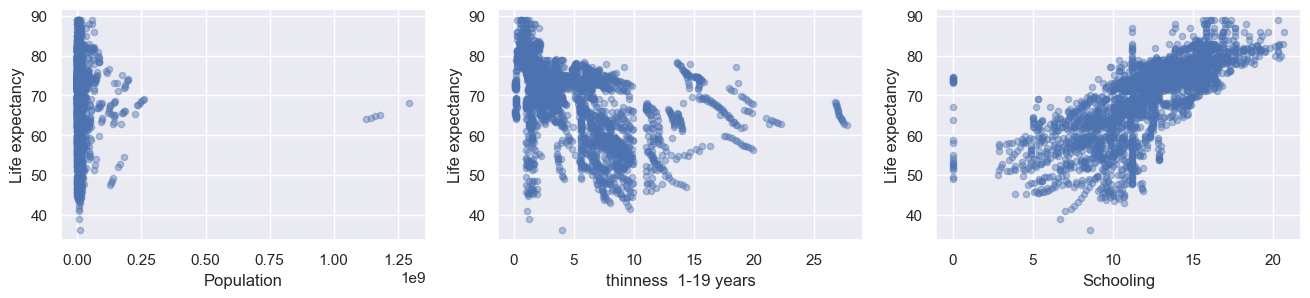

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['Population', 'thinness  1-19 years', 'Schooling'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy', ax=ax, alpha=0.4, color='b')

C:\Users\jona_\AppData\Local\Temp\ipykernel_32196\3493436116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Life expectancy'])


<Axes: xlabel='Life expectancy', ylabel='Density'>

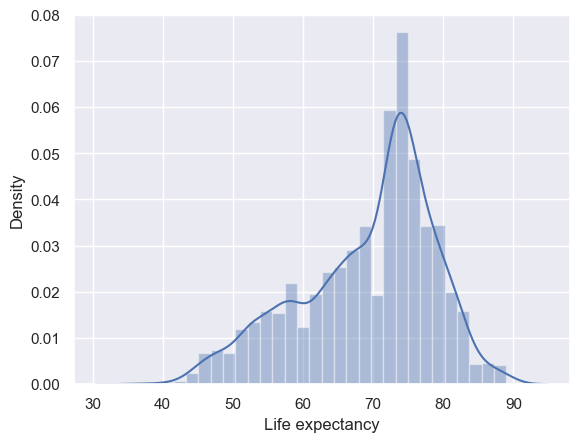

In [52]:
# Below we will visualize the distribution of dependent variable
sns.distplot(data['Life expectancy'])

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# Because we have many outliers and different data scaling we will use scaling transform
# Columns to scale
cols_to_scale = ['Life expectancy', 'Adult Mortality','infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

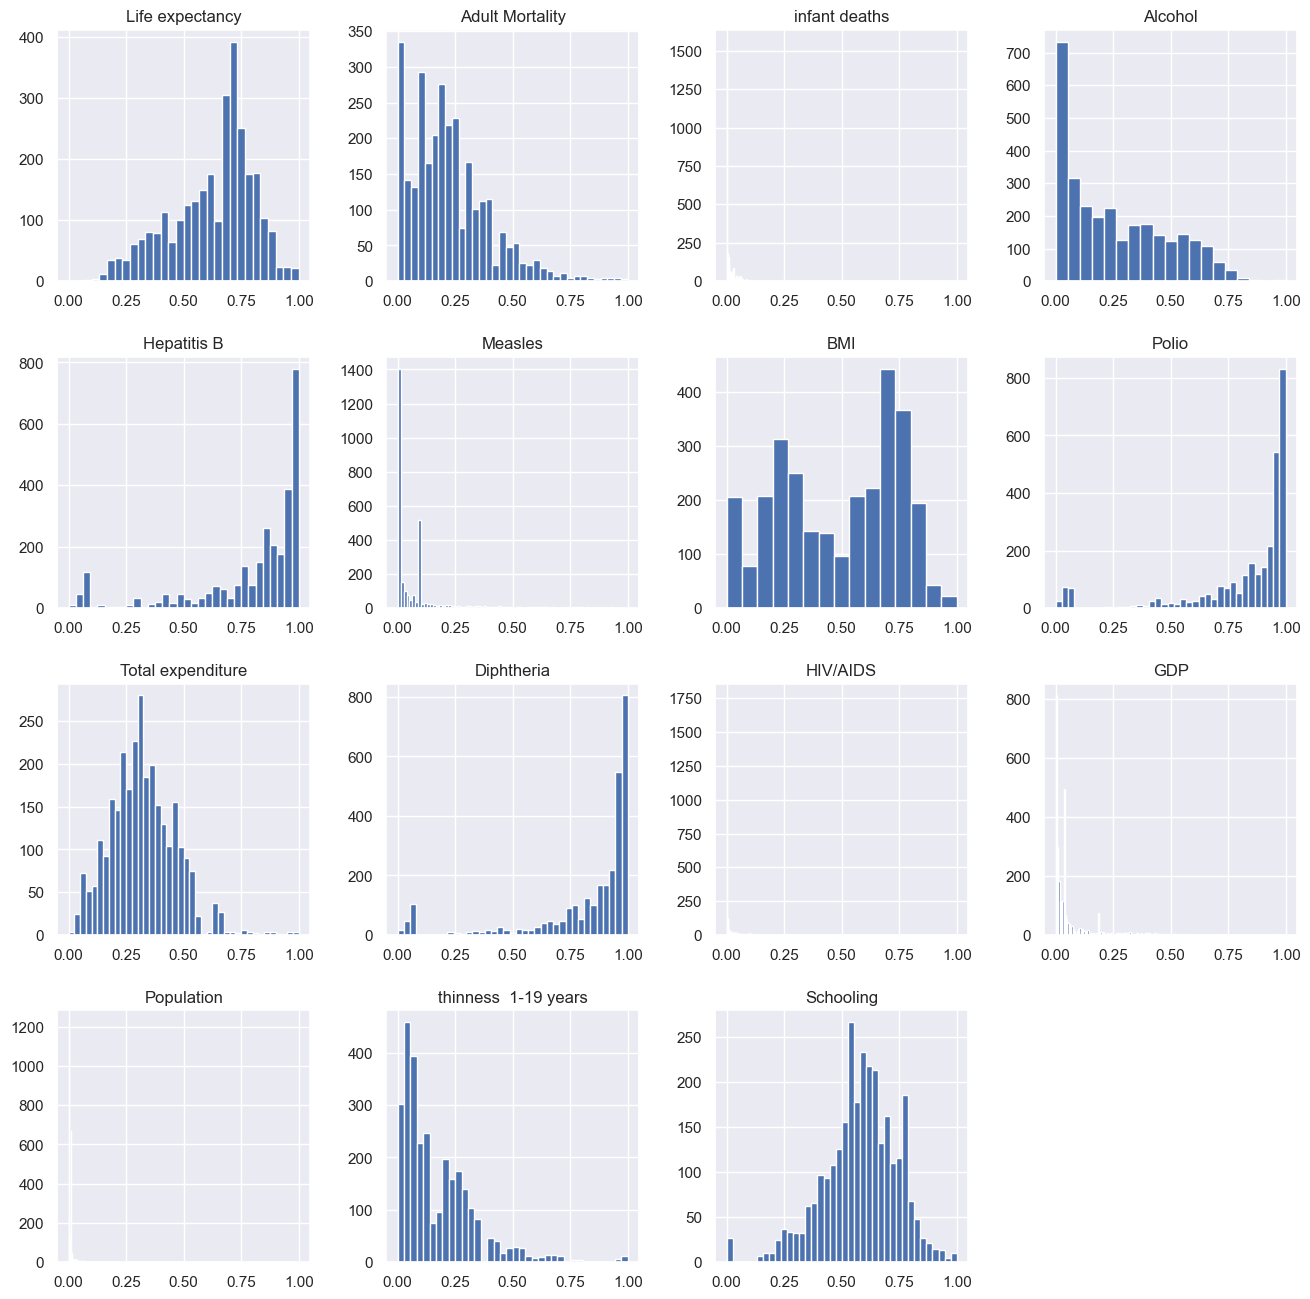

In [55]:
# Below we will visualize our continuous predictors by histograms
data[cols_to_scale].hist(figsize  = [16, 16], bins='auto');

In [56]:
categoricals=['Status']

In [57]:
# Create dummy variables
dummies = pd.get_dummies(data[categoricals], columns=['Status'], drop_first=True)
print(dummies)

      Status_Developing
0                  True
1                  True
2                  True
3                  True
4                  True
...                 ...
2933               True
2934               True
2935               True
2936               True
2937               True

[2928 rows x 1 columns]


In [58]:
# Create our final dataframe after scaling and dummy varibles
df_final = pd.concat([data[cols_to_scale], dummies], axis=1)

In [59]:
# Below we will check if we havde all the data needed
df_final.head()

Life expectancy  Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0         0.544592         0.362881          0.062      0.0     0.653061   
1         0.447818         0.373961          0.064      0.0     0.622449   
2         0.447818         0.369806          0.066      0.0     0.642857   
3         0.440228         0.375346          0.069      0.0     0.673469   
4         0.434535         0.379501          0.071      0.0     0.683673   

    Measles       BMI     Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0  0.092694  0.236292  0.031250           0.452118    0.649485       0.0   
1  0.492492  0.229765  0.572917           0.453279    0.618557       0.0   
2  0.430430  0.223238  0.614583           0.450377    0.639175       0.0   
3  0.092694  0.216710  0.666667           0.473012    0.670103       0.0   
4  0.092694  0.211488  0.677083           0.435287    0.680412       0.0   

        GDP  Population  thinness  1-19 years  Schooling  Status_Developing  
0  0.004889    0.026074              0.619565   0.487923               True  
1  0.005127    0.000253              0.630435   0.483092               True  
2  0.005287    0.024525              0.637681   0.478261               True  
3  0.005608    0.002857              0.644928   0.473430               True  
4  0.000519    0.002302              0.655797   0.458937               True

In [60]:
# Now we will create our model
X = df_final.drop('Life expectancy', axis=1)
y = df_final['Life expectancy']

In [61]:
X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     819.8
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:24:48   Log-Likelihood:                 3275.2
No. Observations:                2928   AIC:                            -6518.
Df Residuals:                    2912   BIC:                            -6423.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3631      0.013     28.968      0.000       0.339       0.388
Adult Mortality         -0.2740      0.011    -24.483      0.000      -0.296      -0.252
infant deaths           -0.1440      0.024     -5.934      0.000      -0.192      -0.096
Alcohol                  0.0039      0.009      0.436      0.663      -0.014       0.022
Hepatitis B             -0.0077      0.007     -1.032      0.302      -0.022       0.007
Measles                 -0.0255      0.009     -2.871      0.004      -0.043      -0.008
BMI                      0.0622      0.007      8.388      0.000       0.048       0.077
Polio                    0.0551      0.008      6.534      0.000       0.039       0.072
Total expenditure       -0.0030      0.011     -0.263      0.792      -0.025       0.019
Diphtheria               0.0788      0.009      8.704      0.000       0.061       0.097
HIV/AIDS                -0.4684      0.017    -27.041      0.000      -0.502      -0.434
GDP                      0.1236      0.016      7.838      0.000       0.093       0.154
Population               0.0720      0.038      1.917      0.055      -0.002       0.146
thinness  1-19 years    -0.0398      0.012     -3.238      0.001      -0.064      -0.016
Schooling                0.3912      0.014     27.848      0.000       0.364       0.419
Status_Developing       -0.0231      0.005     -4.248      0.000      -0.034      -0.012
==============================================================================
Omnibus:                      118.276   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.237
Skew:                          -0.175   Prob(JB):                     4.30e-68
Kurtosis:                       4.556   Cond. No.                         55.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

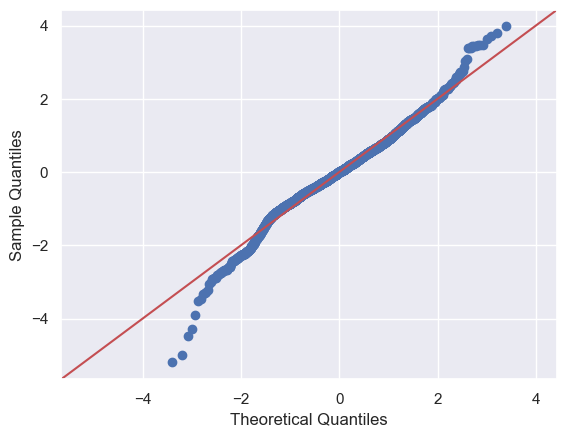

In [62]:
# Now we will visualize the normality of residuals in our model 
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [63]:
#To check homoscedasticity we will show in a graph the residuals and y predicted values
y_pred = model.predict(X_int)

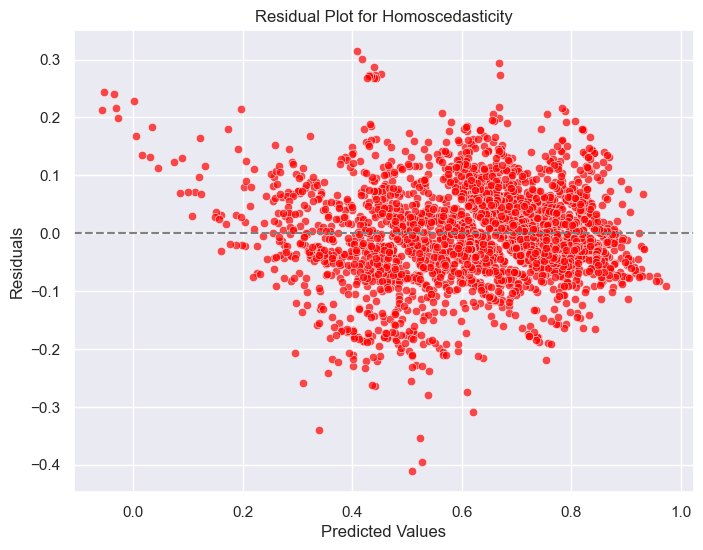

In [64]:
# Now we can have a look at our data statistics
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=model.resid, data=data, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [65]:
# Conclusions for Model 
#Following are the conclusions based on the model we built.

#1) R-squared and Adjusted R-squared (extent of fit) are the same 0.80, which indicates that 80% of the variance of life excpectancy can be explained by our predictors.
#2) Prob(F-stats) (overall model fit) is  0.00 - Model fit is  statistically significant.
#3) p-values for some coefficients seem to be less than the significance level of 0.05. This indicates that some of the predictors are statistically significant.

# As we can see from our model result some coeficient like: Alcohol, Hepatitis B, Total Expenditure and Population are not statistically important as p values for these coefficients are more than 0.05.
# We will remove these coefficients from our model and see what happens with our model and if R-squared will change.

In [80]:
# Below we will drop the columns we dont need
df_final=df_final[['Life expectancy', 'Adult Mortality', 'infant deaths', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness  1-19 years','Schooling', 'Status_Developing']].copy()

In [81]:
# Our final data after dropping Alcohol, Hepatitis B, Total Expenditure and Population
df_final.head()

Life expectancy  Adult Mortality  infant deaths   Measles       BMI  \
0         0.544592         0.362881          0.062  0.092694  0.236292   
1         0.447818         0.373961          0.064  0.492492  0.229765   
2         0.447818         0.369806          0.066  0.430430  0.223238   
3         0.440228         0.375346          0.069  0.092694  0.216710   
4         0.434535         0.379501          0.071  0.092694  0.211488   

      Polio  Diphtheria  HIV/AIDS       GDP  thinness  1-19 years  Schooling  \
0  0.031250    0.649485       0.0  0.004889              0.619565   0.487923   
1  0.572917    0.618557       0.0  0.005127              0.630435   0.483092   
2  0.614583    0.639175       0.0  0.005287              0.637681   0.478261   
3  0.666667    0.670103       0.0  0.005608              0.644928   0.473430   
4  0.677083    0.680412       0.0  0.000519              0.655797   0.458937   

   Status_Developing  
0               True  
1               True  
2               True  
3               True  
4               True

In [82]:
# Create again our model
X = df_final.drop('Life expectancy', axis=1)
y = df_final['Life expectancy']

In [83]:
X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1117.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:31:43   Log-Likelihood:                 3272.4
No. Observations:                2928   AIC:                            -6521.
Df Residuals:                    2916   BIC:                            -6449.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3598      0.012     30.641      0.000       0.337       0.383
Adult Mortality         -0.2743      0.011    -24.614      0.000      -0.296      -0.252
infant deaths           -0.1314      0.024     -5.567      0.000      -0.178      -0.085
Measles                 -0.0260      0.009     -2.931      0.003      -0.043      -0.009
BMI                      0.0628      0.007      8.495      0.000       0.048       0.077
Polio                    0.0537      0.008      6.448      0.000       0.037       0.070
Diphtheria               0.0754      0.008      9.044      0.000       0.059       0.092
HIV/AIDS                -0.4687      0.017    -27.278      0.000      -0.502      -0.435
GDP                      0.1251      0.016      7.954      0.000       0.094       0.156
thinness  1-19 years    -0.0358      0.012     -3.063      0.002      -0.059      -0.013
Schooling                0.3935      0.014     29.073      0.000       0.367       0.420
Status_Developing       -0.0239      0.005     -4.840      0.000      -0.034      -0.014
==============================================================================
Omnibus:                      121.642   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.904
Skew:                          -0.180   Prob(JB):                     7.63e-71
Kurtosis:                       4.587   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

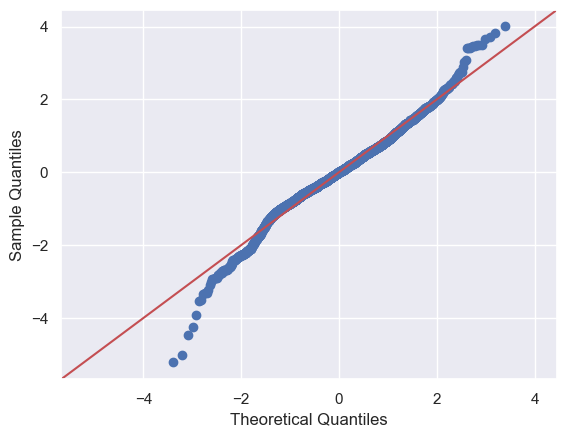

In [84]:
# Now we will visualize the normality of residuals in our model 
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [100]:
#To check homoscedasticity we will show in a graph the residuals and y predicted values
y_pred = model.predict(X_int)

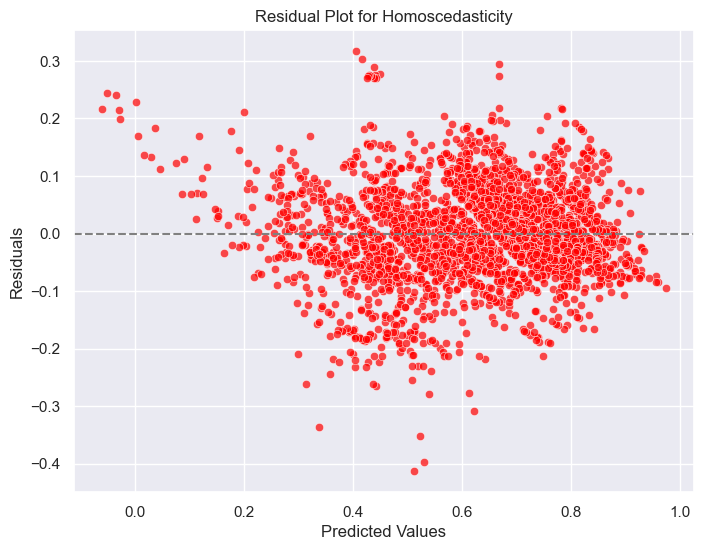

In [101]:
# Now we can have a look at our data statistics
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=model.resid, data=data, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [86]:
# Conclusions for Model 
#Following are the conclusions based on the final model we built.

#1) Even after dropping the coefficients that were not statistically important, the R-squared and Adjusted R-squared (extent of fit) are still the same 0.80, which indicates that 80% of the variance of life excpectancy can be explained by our predictors.
#2) Prob(F-stats) (overall model fit) is  0.00 - Model fit is  statistically significant.
#3) p-values now for all our coefficients seem to be less than the significance level of 0.05. This indicates that our predictors are statistically significant.

#The results show that GDP and Schooling have the highest positively affect in life expectancy and HIV AIDS and Adult Mortality have the highest negatively affect in life expectancy.
#From our visualization of the normality and variance of our residuals, we can say that residuals are normally distributed and there is no heteroscedasticity in our data.


In [87]:
# Now we will evaluate our Model

In [88]:
#Import libraries we need for evaluation
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [89]:
# For evaluation of my model l am using Cross Validation. The data will be divided in 5 groups.

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
linreg = LinearRegression()

In [92]:
cross_validate(linreg, X_int, y, return_train_score=True)

{'fit_time': array([0.00978565, 0.        , 0.        , 0.0182631 , 0.        ]),
 'score_time': array([0.00633645, 0.        , 0.01562071, 0.        , 0.01357722]),
 'test_score': array([0.80688521, 0.80342726, 0.78246092, 0.76247641, 0.81049143]),
 'train_score': array([0.80606022, 0.8081489 , 0.81229572, 0.81732738, 0.80239927])}

In [97]:
train_avg = -cross_val_results["train_score"].mean()
train_avg

0.006222234930777016

In [98]:
test_avg = -cross_val_results["test_score"].mean()
test_avg

0.006669093999528221

In [99]:
# Below we will calculate the difference of MSE for train and test data
diff_MSE=train_avg - test_avg
diff_MSE

-0.00044685906875120435

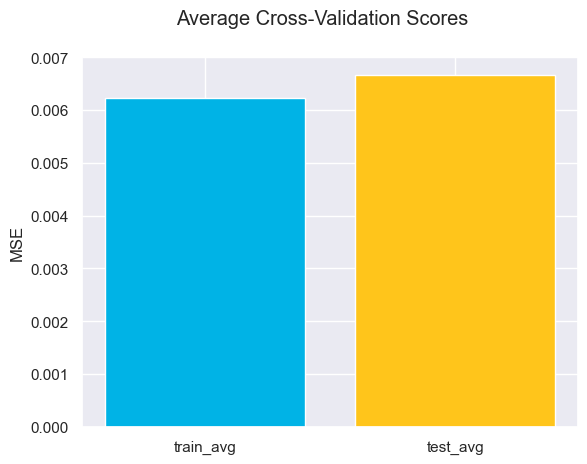

In [96]:
# Let's visualize the two indicatores to have a better idea of the differnce between two of them
cross_val_results = cross_validate(linreg, X_int, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
labels = ["train_avg", "test_avg"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [ ]:
# The graph and above calculations show that the difference between MSE of train and MSE of test is insignificant (-0.0004). 
# Our model is neither overfitting nor underfitting!